### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

# DoIT Help Desk Employee Scheduling Optimization #

#### Firstname Lastname (Email, StudentID)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

In this project, our goal is to find the optimization model that determines the optimal employee schedule which minimizes the cost of running the Help Desk while maximizing employee satisfaction.

The DoIT Help Desk is the IT Help Desk at University of Wisconsin-Madison, which has around 60 to 80 student employees on any given semester. The number of employees makes the process of shift scheduling difficult. Currently the employee schedule building is a tedious manual process done by several of the higher level employees. My motivation is to automate this process according to the constraints specified by our supervisor, Steve Schroeder. 

This type of problem is called a Multiple Skill Hierarchical Scheduling Problem. A schedule optimization is often required in workplaces with long, flexible shifts, such as healthcare, maintenence crew, and of course call centers. While there are some similarities to an assignment problem, there are a few key differences. One, we are assigning the employees multiple times, and two, the assignment structure is hierarchical, meaning a higher level employees can work a lower level shift, but cannot happen vice versa.

There are several requirements for shift scheduling. The work hours are from 7AM to 11PM every day of the week, and each shift is divided into 30 minute blocks (thus there are 32 shift blocks per day). Each employee has to work between 10 to 15 hours a week, and an employee cannot work for more then 8 hours a day.The shifts can be non-consecutive.

There are 4 training levels for the employees; General, Advanced, Chat/Email, and Quality Assurance. The pay rates are $\$$9.75, $\$$10.25, $\$$10.50, and $\$$11.75 respectively. Your level increases the more you train. . For each shift block there must be 1 Quality Assurance and Chat/Email agents, and 1 or more Advanced and General agents. You can see how the schedule is displayed in the picture below:

<img src = "schedule.png" style="height: 300px;"></img>

Furthermore, when the employees submit their availability for the semester, they mark each shift into 3 categories; Available (in Green), Prefer not to work but Available (Yellow), and Unavailable (Red). An example of the availability data is shown below. We would want to try to schedule the employees to the Available blocks as much as possible. Again, see the picture below for reference.

<img src = "available.png" style="height: 300px;"></img>

The availability and training level data gathered for this project is the actual anonymized data for DoIT Help Desk student employees in the Fall semester of 2018. The data is contained in a .csv file. There will be 8 files; the first 7 will contain the data of all the employee's availability for each day, and the last file contains the training level of each employee.

Here are the list of assumptions we will make to build this model.
* The hourly pay of the employee will change based on the type of shift they will work, instead of keeping the hourly pay the same throughout the training level. For example, if there is a Level 2 agent, her total salary would be Cost 4 x Level 4 shifts + Cost 3 x Level 3 shifts + Cost 2 x Level 2 shifts, instead of Cost 2 x All shifts
* There is at least 1 avaialable employee for all training levels per shift (regardless of their preference towards shift).

We will fist define the decision variables, constraints, and objective functions which are based on the rules of the Help Desk above. In the same section, we will also calculate a weighted parameter matrix which favors the employee's shift preferences. After we have solved the model, we will display the results in a table (for the schedule), bar graphs (for the work hours and salaruy for the employee, as well as the total expense for the Help Desk) and pie charts (to depict the ratio of shift types for a typical employee). 

## 2. Mathematical model ##

### 2.1 Parameters ###

First, we must define all the parameters we will use to create the model.

$I: $ The set of shifts per day, indexed by $j ∈ J = {1, 2, ..., n} $ <br>
There are 16 hours in a work day (from 7AM to 11PM), and each shift is broken up into 30 minute blocks. Thus, there will be 32 shifts per day. 

$J: $ The set of student employees working in the Help Desk, indexed by $i ∈ I = {1, 2, ..., m} $

$D: $ The set of working days per week, indexed by $d ∈ D = {1, ..., 7} $ <br>
Each day has the same hours, and the store opens 7 days a week.

$L: $ The training levels of employee, $l ∈ L = {1, 2, 3, 4} $ <br>
Each of the categories represent (by order), Quality Assurance Agent, Chat/Email Agent, Advanced Phone Agent, and General Phone Agent

$C_l: $ The pay rate per hour for employee working shift type l, $C _l = {11.75, 10.50, 10.25, 9.75} $ <br>
$l_1, l_2 ∈ L, l_1 < l_2 ⇒ C_{l_1} > C_{l_2}$

We will also have binary variables which express if an agent has already been trained for a level or not

$
p_j = \begin{cases}
  1, & \text{if agent j is trained for QA (Level 1)} \\
  0, & \text{otherwise}.
\end{cases}
$

$
q_j = \begin{cases}
  1, & \text{if agent j is trained for Chat/Email (Level 2)} \\
  0, & \text{otherwise}.
\end{cases}
$

$
r_j = \begin{cases}
  1, & \text{if agent j is trained for Advanced Agent (Level 3)} \\
  0, & \text{otherwise}.
\end{cases}
$

We are not creating a binary variable which determines if an agent is a General agent, because all agents are able to take Level 4 shifts, so in this model there is no need to specify who has only been trained as Level 4. (The method of defining the hierarchy will be explained further in the constraints sections).

### 2.2 Availability/ Shift Weighting ###

Each employees submit their availabillities for the semester, listed in this form:

$$
S_{ijd} = \begin{cases}
  TRUE, & \text{if agent j prefers to work on shift i on day d} \\
  maybe, & \text{if agent j is available but prefers not to work on shift i on day d} \\
  FALSE, & \text{if agent j is unavailable on shift i on day d}.
\end{cases}
$$

To form the problem, we will split this data into two matrices: Available and Preferable.

$$
A_{ijd} = \begin{cases}
  1, & \text{if agent j is available on shift i on day d} \\
  0, & \text{if agent j is unavailable on shift i on day d}.
\end{cases}
$$

$$
P_{ijd} = \begin{cases}
  1, & \text{if agent j prefers to work on shift i on day d} \\
  0, & \text{if agent j does not prefer to work on shift i on day d}.
\end{cases}
$$

Note that it's possible that $A_{ijd} = 1$ & $P_{ijd} = 0$ (where employee is available, but would not prefer to work this shift), but not $A_{ijd} = 0$ & $P_{ijd} = 1$, since if $A_{ijd} = 0$ we will automatically assume that they will not prefer to work this shift, thus $P_{ijd} = 0$.

Our goal is to try to schedule the shifts where the employee finds it to be Available and Preferable. To do so, we will create a weighted matrix so that the preferable shifts are upweighted (using the weighting factor a) and non-preferable shifts are downweighted (using weighting factor b).

For example, say there are 5 available shifts for an agent, and they select one shift to prioritize. Then the weighting factor will be used as follows:

$$(1 + a) + (1 - b) + (1 - b) + (1 - b) + (1 - b) = 5$$

As such, for the equation to work we must set $b < 1$. But we also must think of cases where the number of a > number of b. In these cases, the weight placed on each upweighted shift is less than cases where number of a < number of b, like in the equation above. We must prevent cases where $1+a > 1$, or else the total of the weighted shifts could be larger than the actual number of shifts. Therefore we must set $a < 1$.

Thus we will calculate the weighting factors a and b as follows:

$$ a_{jd} = \frac{\sum_{i∈I} A_{ijd} - \sum_{i∈I} P_{ijd}}{\sum_{i∈I} A_{ijd}} ∀j∈J, d∈D\$$

$$ b_{jd} = a_{jd}\frac{\sum_{i∈I} P_{ijd}}{\sum_{i∈I} A_{ijd} - \sum_{i∈I} P_{ijd}} ∀j∈J, d∈D\$$

To prevent errors occuring because of dividing by 0, we will specify that:

$$
(\sum_{i∈I} A_{ijd} = 0) ∨ (\sum_{i∈I} A_{ijd} - \sum_{i∈I} P_{ijd} = 0) ⇒ a_{jd} = b_{jd} = 0
$$

Thus we will calculate the Weighted Preference matrix for each shift, employee, and day as follows:

$$
T_{ijd} = \begin{cases}
  0, & \text{if} A_{ijd} = 0\\
  1 + a_{jd}, & \text{if} A_{ijd} = 1 \& P_{ijd} = 1 \\
  1 - b_{jd}, & \text{if} A_{ijd} = 1 \& P_{ijd} = 0 \\
\end{cases}
$$

### 2.3 Decision Variables ###

There are 4 Decision Variables we will use for this problem, each representing the type of shift an agent takes on a given shift.

$$
w_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on a QA shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$$

$$
x_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on a Chat/Email shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$$

$$
y_{ijd} = \begin{cases}
  1, & \text{if agent j is scheduled on an Advanced Agent shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$$

$$
z_{ijd} = \begin{cases}
  1, & \text{iif agent j is scheduled on a General Agent shift i on day d} \\
  0, & \text{otherwise}.
\end{cases}
$$

### 2.4 Constraints ###

We will express the multiple requirements for working in the Help Desk as constraints

Each agent must work between 10 to 15 hours per week. Since each shift is listed in 30 minute intervals, we will double the number of hours.

$$\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  30 \:∀j∈J $$
$$\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≥ 20 \:∀j∈J$$

An agent must not work more than 8 hours a day, to prevent the Help Desk from paying an extra fee for overtime work. The same logic above is applied, and we will double the number to represent the number of half hour shifts.

$$\sum_{i∈I} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  16 \:∀j∈J, d∈D$$

In a given shift, there must be exactly one QA and Chat/Email agent, and one or more Phone agents (which includes Advanced and General). We will use the binary variables (specifing the level of the agents). We prevent scheduling lower level agents from taking a higher level shift, but allow higher level agents to take a lower level shift (by adding the binary variables, it increases the number of agents that can take the shift). For General shifts, everyone can be scheduled in it, so we don't need to specify the levels.

$$\sum_{j∈J} p_j w_{ijd} =  1 \:∀i∈I, d∈D$$
$$\sum_{j∈J} (p_j + q_j)x_{ijd} =  1 \:∀i∈I, d∈D$$
$$\sum_{j∈J} (P_j + q_j + r_j) y_{ijd} ≥  1 \:∀i∈I, d∈D$$
$$\sum_{j∈J} z_{ijd} ≥  1 \:∀i∈I, d∈D$$

The number of phone agents we need for a given shift changes based on the time. If the shift is during business hours (9AM - 5PM), the Help Desk needs 6 or more phone agents. We will also define Sub-Business hours: a few hours before and after business hours where there are a reduced number of calls, but still enough to warrant a fair number of agents. We will define these hours from 8AM - 9AM and 5PM - 8PM. In these sub-business hours, we will require 4 or more phone agents per shift.
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  6 \:\text{for } i = 6,...,20, \:∀d∈D$$
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 3,...,5, \:∀d∈D$$
$$\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 21,...,27, \:∀d∈D$$

Lastly, we will set up a SOS Constraint to prevent agents working duplicate types of shifts at the same time.
$$\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  1 $$

### 2.5 Objective ###

We have two main objectives in this model.

First, we want to minimize the cost spent for the workforce. We will multiply the pay rate per hour for each of the shift types to the total hours worked for said shift type throughout the week. We will sum up the values for each shift type. Since the pay rate is calculated per hour, and the length of each shift is 30 minutes, we will divide the value by half for the accurate cost.

$$\underset{w,x,y,z}{\text{minimize}}\frac{1}{2}\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} C_1 w_{ijd} + C_2 x_{ijd} + C_3 y_{ijd} + C_4 z_{ijd} $$

Second, we want to maximize the employee satisfaction. We will multiply the Weighted Preference matrix to the sum of the decision variables on said shift. The values of the weighted preference matrix will prevent the scheduling of shifts to when the agent is unavailable, and the weight will maximize the number of shifts scheduled to the times the employee prefers.

$$\underset{w,x,y,z}{\text{maximize}}\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} T_{ijd} (w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd}) $$

Thus, to achieve these goals, we will combine the two objectives. To make the second objective into a minimization model, we will subtract it from the first objective. Thus we now have our objective for the model.
$$\underset{w,x,y,z}{\text{minimize}}\frac{1}{2}\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} C_1 w_{ijd} + C_2 x_{ijd} + C_3 y_{ijd} + C_4 z_{ijd} - \sum_{i∈I} \sum_{j∈J} \sum_{d∈D} T_{ijd} (w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd}) $$

### 2.6 Standard Form ###

$$\begin{align}
\underset{w,x,y,z}{\text{minimize}}\qquad&\frac{1}{2}\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} C_1 w_{ijd} + C_2 x_{ijd} + C_3 y_{ijd} + C_4 z_{ijd} - \sum_{i∈I} \sum_{j∈J} \sum_{d∈D} T_{ijd} (w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd}) \\
\text{subject to:}
\qquad&\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  30 \:∀j∈J\\
\qquad&\sum_{i∈I} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≥ 20 \:∀j∈J\\
\qquad&\sum_{i∈I} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  16 \:∀j∈J, d∈D\\
\qquad&\sum_{j∈J} p_j w_{ijd} =  1 \:∀i∈I, d∈D\\
\qquad&\sum_{j∈J} (p_j + q_j) x_{ijd} =  1 \:∀i∈I, d∈D\\
\qquad&\sum_{j∈J} (p_j + q_j + r_j) y_{ijd} ≥  1 \:∀i∈I, d∈D\\
\qquad&\sum_{j∈J} z_{ijd} ≥  1 \:∀i∈I, d∈D\\
\qquad&\sum_{j∈J} y_{ijd} + z_{ijd} ≥  6 \:\text{for } i = 6,...,20, \:∀d∈D\\
\qquad&\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 3,...,5, \:∀d∈D\\
\qquad&\sum_{j∈J} y_{ijd} + z_{ijd} ≥  4 \:\text{for } i = 21,...,27, \:∀d∈D\\
\qquad&\sum_{i∈I} \sum_{j∈J} \sum_{d∈D} w_{ijd} + x_{ijd} + y_{ijd} + z_{ijd} ≤  1 \\
\end{align}$$
   
This model is a Mixed Integer Program, as all the decision variables are integer (binary) variables, and we multiply them with non-integers (such as the pay rate and the weighted preferences).

## 3. Solution ##


First, we will define the Parameters & Information about Pay Rate, Training Level of each agent, and the length and amount of each shift. Readers can adjust the parameters or the employee data to observe how the schedule changes depending on the requirements/data.The training level is loaded from the file training.csv

In [225]:
using JuMP
# Pay rate per hour tor training level 1 to 4
C = [11.75 10.50 10.25 9.75]

# Maximum and minimum work hours per week
maxWeek = 30
minWeek = 20

# Maximum work hours per day
maxDay = 16

# Number of phone agents needed
bussAgents = 6
subBussAgents = 4

# Number of workdays per week
D = 7

# Number of Shifts
I = 32

# Load training level data
training = readcsv("training.csv")

# Number of employees
J = size(training,1) - 1

p = zeros(Int8, J) # Level 1
q = zeros(Int8, J) # Level 2
r = zeros(Int8, J) # Level 3

for j = 2:J+1
    if training[j,2] == 4
        p[j-1] = 1
    elseif training[j,2] == 3
        q[j-1] = 1
    elseif training[j,2] == 2
        r[j-1] = 1
    end
end


Then we will create the Availability and Preference Matrix by reading the availability data submitted by all the employees from a .csv file. Similar to the section above, we can alter the .csv file which we would read, as long as the file has a similar format (includes headers, uses TRUE, maybe, FALSE to denote the availabillity, etc).

In [226]:
using JuMP

# Availability Matrix
A = zeros(Int8, I, J, D)

# Preference Matrix
P = zeros(Int8, I, J, D)

# Read availability information from csv files
Sun = readcsv("Sunday.csv")
Mon = readcsv("Monday.csv")
Tue = readcsv("Tuesday.csv")
Wed = readcsv("Wednesday.csv")
Thur = readcsv("Thursday.csv")
Fri = readcsv("Friday.csv")
Sat = readcsv("Saturday.csv")
raw = [Sun[:,:], Mon[:,:], Tue[:,:], Wed[:,:], Thur[:,:], Fri[:,:], Sat[:,:]]

# Fill in Availability and Preference matrix
for d = 1:D
    for i = 3:I+2
        for j = 2:J+1
            if raw[d][j,i] == "TRUE"
                A[i-2, j-1, d] = 1
                P[i-2, j-1, d] = 1
            elseif raw[d][j,i] == "maybe"
                A[i-2, j-1, d] = 1
            end
        end
    end
end

After collecting the Availability and the Preference Matrix, now we will calculate the alpha values and the beta values for each agent and each then. Then, we will use those values to create a weighted preference matrix which will favor the Available blocks (marked in Green) than the Not Preferable blocks (marked in Yellow). It will also ensure that agents will not be schedules for blocks which they are Unavailable (marked in Red).

In [227]:
# Calculate weighted preferences

a = zeros(J,D) # Alpha values
b = zeros(J,D) # Beta values

# Calculate the alpha and beta values for each agent and each day
for d = 1:D
    for j = 1:J
        # If Sum of Availabilities is 0, or Sum of Availabilities == Sum of Preferences, leave the value of 
        # Alpha and Beta as 0 
        if sum(A[i,j,d] for i=1:I) != 0 && sum(A[i,j,d] for i=1:I) != sum(P[i,j,d] for i=1:I)
            a[j,d] = (sum(A[i,j,d] for i=1:I) -  sum(P[i,j,d] for i=1:I)) / sum(A[i,j,d] for i=1:I)
            b[j,d] = a[j,d] * (sum(P[i,j,d] for i=1:I) / (sum(A[i,j,d] for i=1:I) -  sum(P[i,j,d] for i=1:I)))
        end
    end
end

# Create the weighted preference matrix
T = zeros(I,J,D)

for d = 1:D
    for i = 1:I
        for j = 1:J
            if A[i,j,d] == 1 && P[i,j,d] == 1
                T[i,j,d] = 1 + a[j,d]
            elseif A[i,j,d] == 1 && P[i,j,d] == 0
                T[i,j,d] = 1 - b[j,d]
            end
        end
    end
end

Now we that we have all the necessary data, we will solve the model.

In [235]:
using JuMP, Cbc
m = Model(solver = CbcSolver())

# ----------------------- Variables --------------------------
@variable(m, w[1:I, 1:J, 1:D], Bin) # Level 1 shifts (QA)
@variable(m, x[1:I, 1:J, 1:D], Bin) # Level 2 shifts (Chat/Email)
@variable(m, y[1:I, 1:J, 1:D], Bin) # Level 3 shifts (Advanced)
@variable(m, z[1:I, 1:J, 1:D], Bin) # Level 4 shifts (General)

# ----------------------- Constraints --------------------------

# Total number of shift per week must be between 10 to 15 hours
for j = 1:J
    @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I, d = 1:D) <= maxWeek)
    @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I, d = 1:D) >= minWeek)
end

# Employee must not work more than 8 hours per day
for j = 1:J
    for d = 1:D
        @constraint(m, sum(w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] for i = 1:I) <= maxDay)
    end
end

# Number of agents working per shift
for i = 1:I
    for d = 1:D
        # There will be only 1 agent for Quality Assurance and Chat/Email
        @constraint(m, sum(p[j] * w[i,j,d] for j = 1:J) == 1)
        @constraint(m, sum((p[j] + q[j]) * x[i,j,d] for j = 1:J) == 1)
        
        # There will be 1 or more agents for Advanced and General agents
        @constraint(m, sum((p[j] + q[j] + r[j]) * y[i,j,d] for j = 1:J) >= 1)
        @constraint(m, sum(z[i,j,d] for j = 1:J) >= 1)
        
        #If it's business hours, there will be at leas 6 phone agents per shift
        if i > 5 && i < 21
            @constraint(m, sum(y[i,j,d] + z[i,j,d] for j = 1:J) >= bussAgents)
        # For a sub-business hours, there will be at least 4 phone agents per shift
        elseif i > 20 && i < 28 || i > 2 && i < 6
            @constraint(m, sum(y[i,j,d] + z[i,j,d] for j = 1:J) >= subBussAgents)
        end
    end
end

# SOS constraint: One agent cannot work multiple types of shifts at the same time
for i = 1:I
    for j = 1:J
        for d = 1:D
            @constraint(m, w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d] <= 1)
        end
    end
end

# ----------------------- Objectives --------------------------

# Minimize the overall cost and Maximize Employee Satisfaction to schedule the shifts
@objective(m, Min, 0.5*sum(C[1] * w[i,j,d] + C[2] * x[i,j,d] + C[3] * y[i,j,d] + C[4] * z[i,j,d] for i = 1:I, j = 1:J, d = 1:D) 
            - sum((w[i,j,d] + x[i,j,d] + y[i,j,d] + z[i,j,d]) * T[i,j,d] for i = 1:I, j = 1:J, d = 1:D))

status = solve(m)
println(getobjectivevalue(m))

5500.183427795606


## 4. Results and discussion ##

We will display the results in tables (for the schedule itself) and graphs (to compare which agent has how many hours per week).

### 4.1 Training Level Table ###
First, we will show the different training levels of the agents

In [240]:
using DataFrames
L1 = [j for j = 1:J if p[j] == 1]
L2 = [j for j = 1:J if q[j] == 1]
L3 = [j for j = 1:J if r[j] == 1]
L4 = [j for j = 1:J if p[j] != 1 && q[j] != 1 && r[j] != 1]
                                                
Agents = []
push!(Agents, L1)
push!(Agents, L2)
push!(Agents, L3)
push!(Agents, L4)                                                
Position = ["QA", "Chat/Email", "Advanced", "General"]
                                                
df = DataFrame(pos = Position, agnt = Agents)
names!(df, [Symbol("Positions"), Symbol("Agents")])
df

,Positions,Agents
1,QA,"[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 35, 36]"
2,Chat/Email,"[6, 25, 27, 28, 29, 30, 31, 33, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 55, 60]"
3,Advanced,"[20, 34, 37, 38, 39, 47, 51, 52, 53, 54, 56, 62]"
4,General,"[32, 57, 58, 59, 61, 63]"


### 4.2 Schedule Table Visualization###

In [242]:
using DataFrames
Time = ["7:00", "7:30", "8:00", "8:30", "9:00", "9:30", "10:00", "10:30", "11:00", "11:30", "12:00", "12:30", "13:00",
        "13:30", "14:00", "14:30", "15:00", "15:30", "16:00", "16:30", "17:00", "17:30", "18:00", "18:30", "19:00", 
        "19:30", "20:00", "20:30", "21:00", "21:30", "22:00", "22:30"]
Days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] 

# Write schedule in a table
for d = 1:D
    QA = []
    Chat = []
    Advanced = []
    General = []

    # Find the employees that are scheduled for each shift
    for i = 1:I
        push!(QA,[j for j = 1:J if getvalue(w[i,j,d]) == 1])
        push!(Chat,[j for j = 1:J if getvalue(x[i,j,d]) == 1])
        push!(Advanced, [j for j = 1:J if getvalue(y[i,j,d]) == 1])
        push!(General, [j for j = 1:J if getvalue(z[i,j,d]) == 1])
    end
    
    println(Days[d])
    df = DataFrame(time = Time, level1 = QA, level2 = Chat, level3 = Advanced, level4 = General)
    names!(df, [Symbol("Time"), Symbol("QA"), Symbol("Chat/Email"), Symbol("Advanced"), Symbol("General")])
    showall(df)                                                   
    println()
    println()
end

Sunday
32×5 DataFrames.DataFrame
│ Row │ Time  │ QA   │ Chat/Email │ Advanced │ General              │
├─────┼───────┼──────┼────────────┼──────────┼──────────────────────┤
│ 1   │ 7:00  │ [17] │ [5]        │ [39]     │ [60]                 │
│ 2   │ 7:30  │ [5]  │ [60]       │ [39]     │ [17]                 │
│ 3   │ 8:00  │ [17] │ [30]       │ [60]     │ [5, 39, 57]          │
│ 4   │ 8:30  │ [5]  │ [30]       │ [4]      │ [17, 23, 60]         │
│ 5   │ 9:00  │ [17] │ [5]        │ [4]      │ [26, 30, 57]         │
│ 6   │ 9:30  │ [36] │ [23]       │ [38]     │ [5, 21, 25, 26, 30]  │
│ 7   │ 10:00 │ [26] │ [45]       │ [38]     │ [2, 5, 21, 39, 63]   │
│ 8   │ 10:30 │ [21] │ [45]       │ [26]     │ [2, 10, 11, 38, 39]  │
│ 9   │ 11:00 │ [26] │ [10]       │ [13]     │ [2, 11, 17, 20, 45]  │
│ 10  │ 11:30 │ [26] │ [21]       │ [17]     │ [2, 13, 28, 57, 63]  │
│ 11  │ 12:00 │ [13] │ [28]       │ [20]     │ [2, 17, 21, 26, 57]  │
│ 12  │ 12:30 │ [2]  │ [28]       │ [42]     │ [10, 16, 2

│ 13  │ 13:00 │ [16] │ [23]       │ [46]     │ [10, 11, 15, 35, 61] │
│ 14  │ 13:30 │ [11] │ [23]       │ [35]     │ [6, 15, 36, 46, 48]  │
│ 15  │ 14:00 │ [23] │ [35]       │ [48]     │ [6, 11, 15, 36, 46]  │
│ 16  │ 14:30 │ [11] │ [6]        │ [15]     │ [36, 41, 46, 48, 63] │
│ 17  │ 15:00 │ [15] │ [41]       │ [46]     │ [11, 27, 37, 61, 63] │
│ 18  │ 15:30 │ [7]  │ [41]       │ [31]     │ [11, 15, 25, 27, 63] │
│ 19  │ 16:00 │ [15] │ [11]       │ [25]     │ [7, 27, 31, 41, 63]  │
│ 20  │ 16:30 │ [14] │ [27]       │ [25]     │ [7, 11, 20, 31, 41]  │
│ 21  │ 17:00 │ [14] │ [31]       │ [27]     │ [7, 20, 25]          │
│ 22  │ 17:30 │ [11] │ [41]       │ [7]      │ [25, 31, 63]         │
│ 23  │ 18:00 │ [11] │ [31]       │ [25]     │ [7, 16, 41]          │
│ 24  │ 18:30 │ [16] │ [25]       │ [41]     │ [31, 37, 63]         │
│ 25  │ 19:00 │ [12] │ [16]       │ [41]     │ [25, 31, 63]         │
│ 26  │ 19:30 │ [12] │ [31]       │ [41]     │ [14, 16, 25]         │
│ 27  │ 20:00 │ [14]

│ 27  │ 20:00 │ [24] │ [43]       │ [10]     │ [31, 52, 53]         │
│ 28  │ 20:30 │ [4]  │ [31]       │ [53]     │ [52]                 │
│ 29  │ 21:00 │ [4]  │ [43]       │ [52]     │ [53]                 │
│ 30  │ 21:30 │ [10] │ [24]       │ [52]     │ [53]                 │
│ 31  │ 22:00 │ [10] │ [24]       │ [52]     │ [53]                 │
│ 32  │ 22:30 │ [24] │ [43]       │ [53]     │ [52]                 │



From the list of tables representing the schedule of the Help Desk, we can see that we have prevented any conflicts in the employee's schedule, and our method of implementing the hierarchy has worked correctly (Comparing to the training level table).

### 4.3 Weekly Work Hours per Agent ###



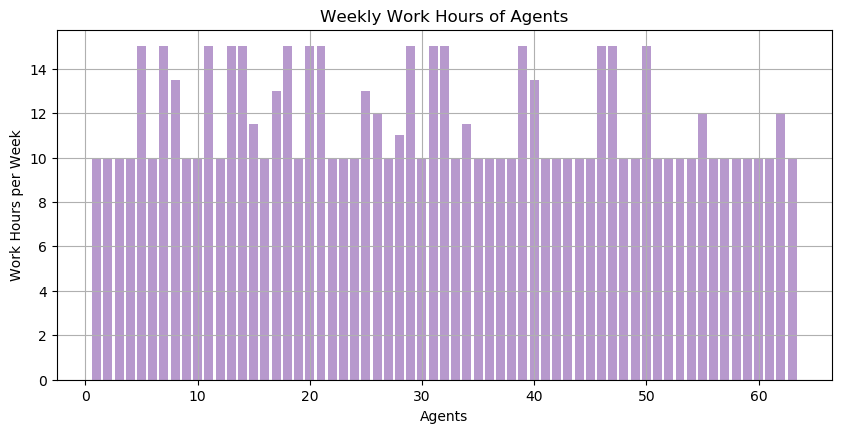

PyObject Text(24.000000000000007, 0.5, 'Work Hours per Week')

In [230]:
using PyPlot

numAgents = []
for j = 1:J
    push!(numAgents, j)
end

# Calculate the total working hours per week for each agent
hoursPerWeek = []
for j = 1:J
   numHours = sum(getvalue(w[i,j,d]) + getvalue(x[i,j,d]) + getvalue(y[i,j,d]) + getvalue(z[i,j,d]) for i = 1:I, d = 1:D) / 2
   push!(hoursPerWeek, numHours)
end

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(numAgents,hoursPerWeek,color = "indigo", align="center",alpha=0.4)
axis("tight")
title("Weekly Work Hours of Agents")
grid("on")
xlabel("Agents")
ylabel("Work Hours per Week")

We have successfully minimized the number of agents working 15 hours a week, which will reduce unnecessary costs especially for agents working in higher level shifts. The majority of agents work 10 hours a week, regardless of shift level, which means that the number of hours you work is dependent on one's availabillity data. However, this may not be ideal for agents who want to work more hours but their schedule does not allow them to do so.

### 4.4 Ratio of Shift Type per Week ###

We will represent this information in a pie chart. Since there are too many employees to display all the graphs, I decided to limit graphing the shift ratio information to two agents; Agent 15 and Agent 46. The reason why I chose these two agents in particular is that the two represents the two trends that occured during scheduling. Agent 15 is a Level 1 agent (QA), while Agent 46 is a Level 2 Agent (Chat/Email).

In [182]:
using PyPlot
function shiftRatio(j)
    labels = ["QA";"Chat/Email";"Advanced";"General"]
    colors = ["crimson";"yellowgreen";"Yellow";"lightblue"]
    sizes = [sum(getvalue(w[i,j,d]) for i=1:I, d=1:D); sum(getvalue(x[i,j,d]) for i=1:I, d=1:D);
                sum(getvalue(y[i,j,d]) for i=1:I, d=1:D); sum(getvalue(z[i,j,d]) for i=1:I, d=1:D)]
    explode = zeros(length(sizes))
    font = Dict("fontname"=>"Sans","weight"=>"semibold");

    p = pie(sizes, labels=labels, shadow=true, startangle=90, colors=colors, autopct="%1.1f%%", textprops=font)
    axis("equal")
    title(string("Ratio of shift types per week for Agent ", j))
    return
end

shiftRatio (generic function with 1 method)

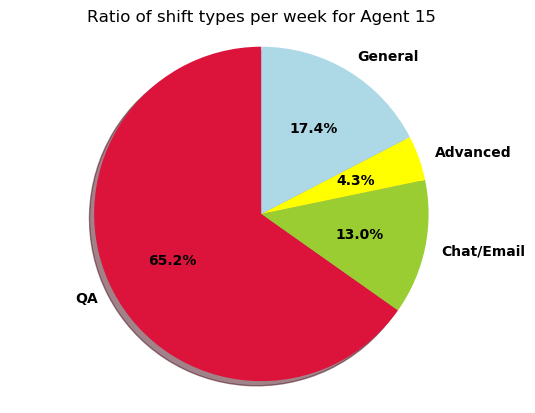

In [217]:
shiftRatio(15)

Agent 15 represents the agents where the majority of the shifts scheduled match the training level of the employee. This was more common with Level 1 (Quality Assurance) agents and of course, Level 4 (General) agents as they are only trained to work for one shift type.

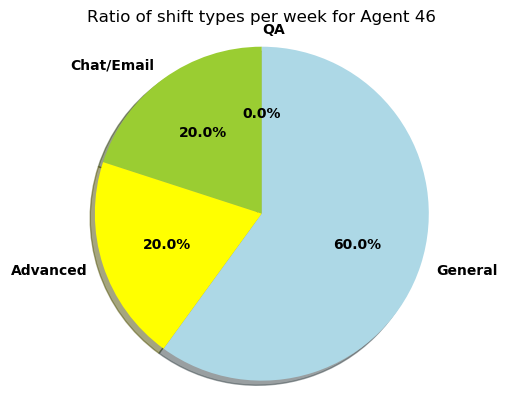

In [218]:
shiftRatio(46)

On the other hand, for some agents the majority of the shifts they were scheduled for were of a lower level than they were trained for. This is because the amount of employees needed to work a Level 4 shift greatly exceeded the needs of the other shift types. While this is cost efficient from a managerial standpoint, if we want to maximize the employees satisfaction working at the Help Desk it is not good, as the employees may get frustrated at the similar salary rate despite training to an advanced level. 

### 4.5 Total Cost per Week ###
The total cost that will be paid to the employees

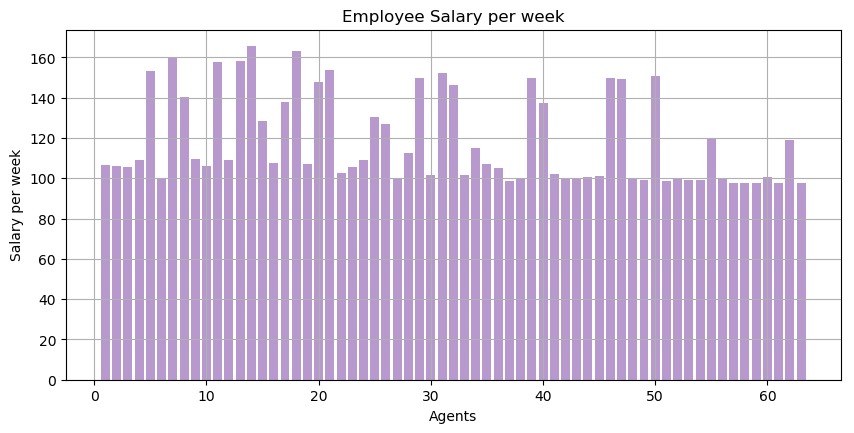

PyObject Text(23.999999999999993, 0.5, 'Salary per week')

In [239]:
numAgents = []
for j = 1:J
    push!(numAgents, j)
end

# Calculate the total working hours per week for each agent
payPerWeek = []
for j = 1:J
   pay = sum(C[1]*getvalue(w[i,j,d]) + C[2]*getvalue(x[i,j,d]) + C[3]*getvalue(y[i,j,d]) + C[4]*getvalue(z[i,j,d]) 
                for i = 1:I, d = 1:D) / 2
   push!(payPerWeek, pay)
end

fig = figure("pyplot_barplot",figsize=(10,10))
subplot(211)
b = bar(numAgents,payPerWeek,color = "indigo", align="center",alpha=0.4)
axis("tight")
title("Employee Salary per week")
grid("on")
xlabel("Agents")
ylabel("Salary per week")

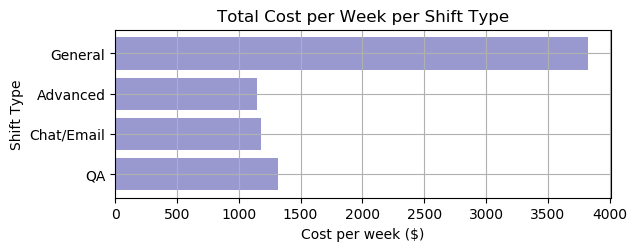

Total cost to run Help Desk in optimal schedule: $7462.0


In [231]:
QAPay = C[1] * sum(getvalue(w[i,j,d]) for i = 1:I, j = 1:J, d = 1:D)/2;
ChatPay = C[2] * sum(getvalue(x[i,j,d]) for i = 1:I, j = 1:J, d = 1:D)/2;
AdvPay = C[3] * sum(getvalue(y[i,j,d]) for i = 1:I, j = 1:J, d = 1:D)/2;
GenPay =  C[4] * sum(getvalue(z[i,j,d]) for i = 1:I, j = 1:J, d = 1:D)/2;

x_axis = []
push!(x_axis,"QA")
push!(x_axis,"Chat/Email")
push!(x_axis,"Advanced")
push!(x_axis,"General")

y_axis = []
push!(y_axis,QAPay)
push!(y_axis,ChatPay)
push!(y_axis,AdvPay)
push!(y_axis,GenPay)

subplot(212)
b = barh(x_axis,y_axis,color="darkblue",align="center",alpha=0.4)
axis("tight")
title("Total Cost per Week per Shift Type")
grid("on")
xlabel("Cost per week (\$)")
ylabel("Shift Type")

TotCost = QAPay + ChatPay + AdvPay + GenPay;
println("Total cost to run Help Desk in optimal schedule: \$", TotCost)

### 4.6 Discussion and Limitations ###

Overall, from the standpoint of managing the Help Desk, the model is satisfactory in its results. There are no conflicts in the schedule, maintains the hierarchical levels, minimizes the total cost of running the Help Desk and even takes into account of the Employee preference in terms of shifts. 

However, one should keep in mind some of the limitations of this model. First, the model is very reliant on our assumptions. If there exists a shift where no employees are available, the model will be infeasible. Furthermore, in a lot of workplaces, the salary is calculated by a fixed hourly cost regardless of their shifts, instead of changing pay rate depending on the type of shift. Thus we will need to create an entirely new model with different decision variables to adjust to this requirement.

Moreover, while the model succeeds in maximizing the employeee satisfaction for their shift preference, it may not in other aspects. Our assumption bases the employee satisfaction solely on their Availability and Preferences. As seen in the graph for employee salary per week, the training level does not correlate with the amount of salary. The work hours do not correlate either. If their salary and work hours are low despite getting trained, the employee might be demotivated to advance, which could nullify the satisfaction gained from the schedule. To account for this, we will need to add more constraints to ensure their satisfaction stays high.

## 5. Conclusion ##

The report showed that it is possible to create a model which would construct an optimal schedule for a Multi-Skill Hierarchical Scheduling problem for the DoIT Help Desk. We succeeded in doing so by seeking the schedule which minimizes the total cost of employing all agents, as well as maximizing the employee satisfaction of their schedule by adhering to the availability and preference data they submitted. Techniques such as logic constraints and weighting which we learned in class was useful to build the optimal model. As we used the real life availability data and work restrictions of the Help Desk, the schedule we produced is close to the ideal schedule that exists in real life.

If I had to repeat this project again, I would try to take in account of the demands for each shift. I was not able to collect the data for the number of calls per shift. The call traffic can differ a lot between the time and day, for example Business Hours (9 to 5) have more calls than other hours, Weekdays more than Weekends and so on). If there are too few employees scheduled in a busy shift the Help Desk will get overwhelmed, and will lead to dissatisfaction among employees. Thus, what I would do is to calculate the average amount of calls received in a particular shift and adjust the demand so that the amount of calls per employee would be roughly similar across the board. 

Furthermore, in the real Help Desk certain agents are Team Leads, who have another type of shift called Project Hours, which allows them to do additional work for the Help Desk (such as developing internal applications, writing technical documentation, training new agents or even scheduling shifts). They are supposed to be 50% of the shifts for a week. If I had the data for call demands, I would add this feature and try to schedule the shifts when there are less calls (so the Help Desk will be impacted less).